In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("../data/Chicago_CrimeData/Preprocessed_gowalla_chicago_alligned_subset_data.csv")

In [4]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,10230609,HY416556,2010-09-09 20:10:00,074XX S MARYLAND AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,...,6.0,69.0,11,1183191.0,1855830.0,2010,02/09/2018 03:44:29 PM,41.759594,-87.604169,"(41.759593809, -87.604169095)"
1,1,10242760,HY431076,2010-01-15 00:01:00,044XX S OAKLEY AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,...,12.0,61.0,02,1161779.0,1875003.0,2010,02/09/2018 03:44:29 PM,41.812678,-87.682112,"(41.812678317, -87.682111569)"
2,2,10247946,HY435598,2010-06-01 12:00:00,005XX N MICHIGAN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,SMALL RETAIL STORE,False,...,42.0,8.0,11,1177342.0,1903838.0,2010,02/09/2018 03:44:29 PM,41.891466,-87.624153,"(41.891465732, -87.624153044)"
3,3,10249850,HS418410,2010-07-19 06:32:00,026XX W MADISON ST,2027,NARCOTICS,POSS: CRACK,STREET,True,...,2.0,27.0,18,1158638.0,1899913.0,2010,02/10/2018 03:50:01 PM,41.881099,-87.692952,"(41.881098841, -87.692951526)"
4,4,10249991,HS271194,2010-04-23 13:25:00,059XX S RACINE AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,RESIDENCE,True,...,16.0,68.0,18,1169336.0,1865429.0,2010,02/10/2018 03:50:01 PM,41.786246,-87.654670,"(41.786245702, -87.654669662)"


In [5]:
df["Date"] = pd.to_datetime(df["Date"])

/var/folders/x7/tccs74xd4wx8fgnlfy4xp_2r0000gn/T/ipykernel_60269/936118274.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [6]:
df["dow"] = df["Date"].dt.dayofweek      # 0=Mon
df["dow_name"] = df["Date"].dt.day_name()
df["hour"] = df["Date"].dt.hour
df["month"] = df["Date"].dt.month
df["year"] = df["Date"].dt.year

total crimes by day of the week

<Axes: title={'center': 'Crimes by Day of Week'}, xlabel='dow_name'>

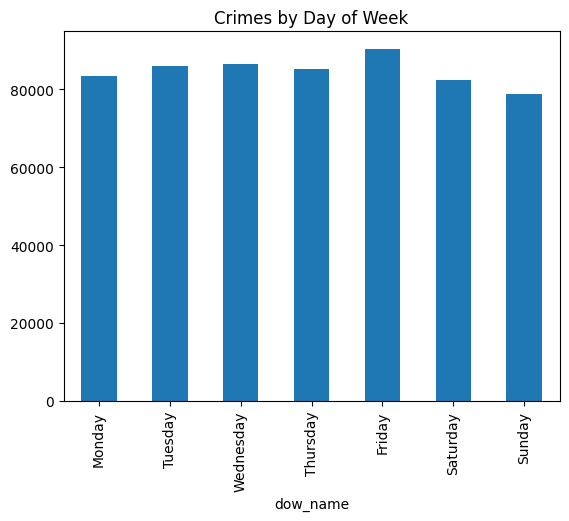

In [7]:
df["dow_name"].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

df["dow_name"].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
).plot(kind="bar", title="Crimes by Day of Week")

crimes by hour of the day

<Axes: title={'center': 'Crimes by Hour of Day'}, xlabel='hour'>

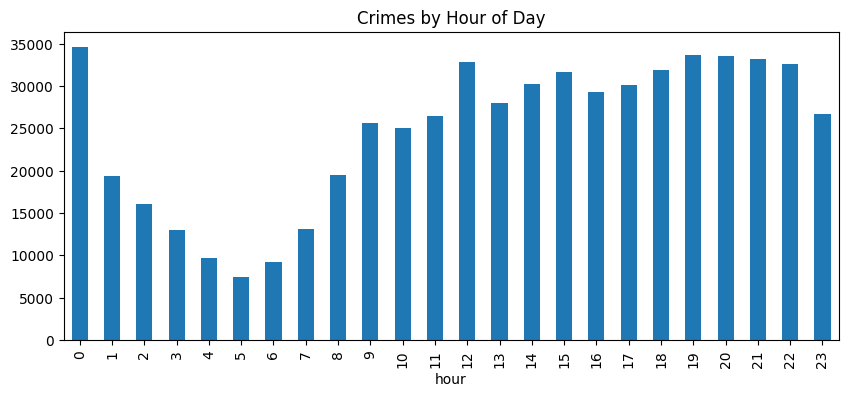

In [8]:
df["hour"].value_counts().sort_index().plot(
    kind="bar",
    title="Crimes by Hour of Day",
    figsize=(10,4)
)

crimes by month

<Axes: title={'center': 'Crimes by Month'}, xlabel='month'>

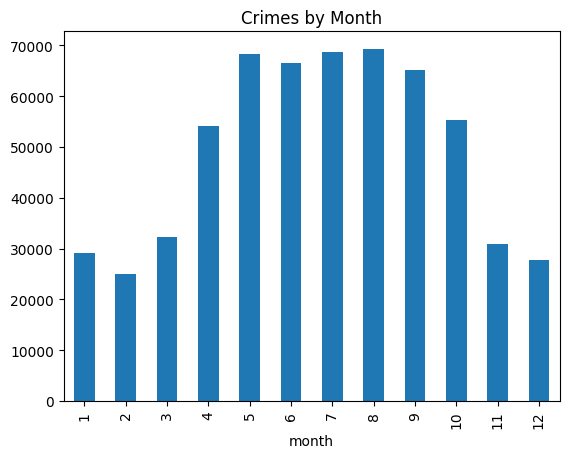

In [9]:
df["month"].value_counts().sort_index().plot(
    kind="bar",
    title="Crimes by Month"
)

crime types by day of the week

<Axes: xlabel='Day of Week', ylabel='Number of Crimes'>

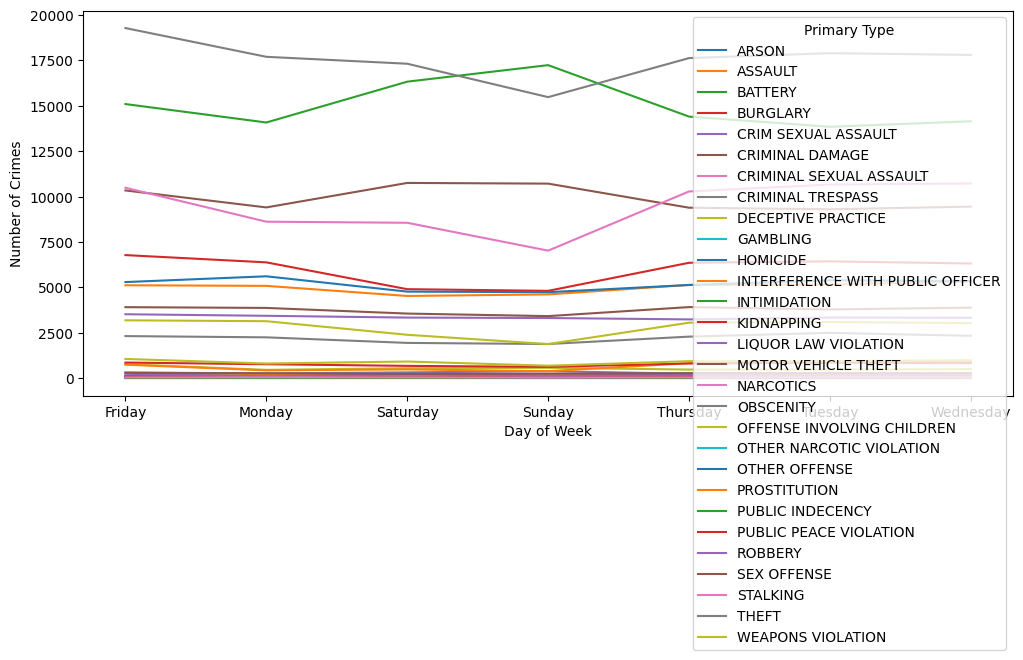

In [17]:
pd.crosstab(
    df["dow_name"],
    df["Primary Type"]
).plot(figsize=(12,5), xlabel="Day of Week", ylabel="Number of Crimes")

crime types by hour of the day

<Axes: xlabel='Hour of Day', ylabel='Number of Crimes'>

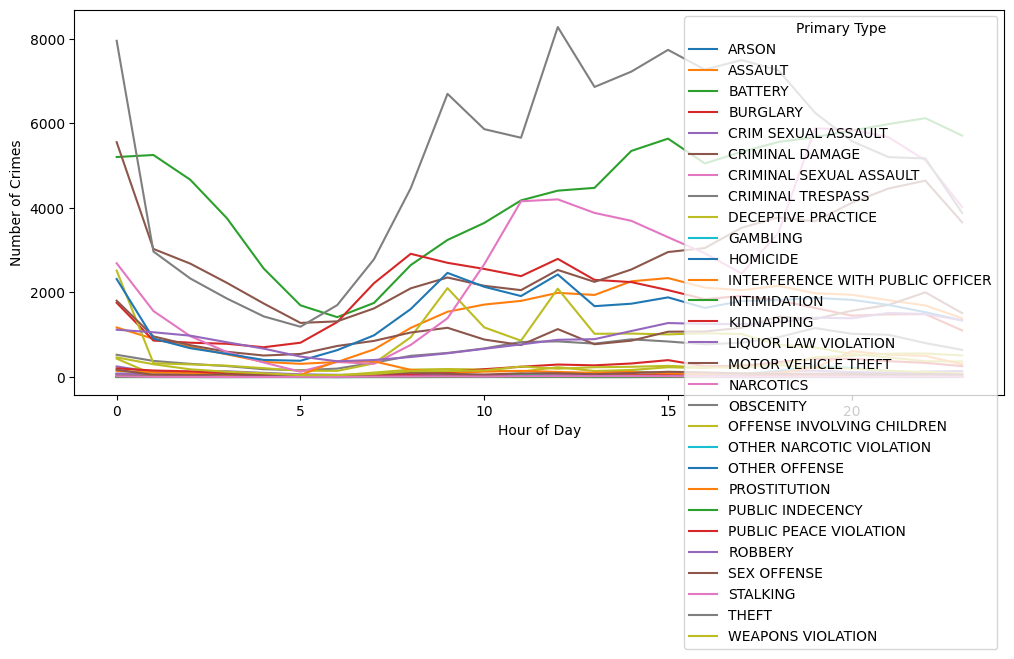

In [18]:
pd.crosstab(
    df["hour"],
    df["Primary Type"]
).plot(figsize=(12,5), xlabel="Hour of Day", ylabel="Number of Crimes")